In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [42]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, visualize, statistical_tests



# Read Data

In [4]:
exemplars_df = pd.read_parquet("./../data/exemplars_wordnet_no_german.parquet")

In [5]:
exemplars_df

ppn medium                                 title_x  \
ppn                                                                   
010007121  010007121    Aar                           @Jean-Jacques   
010007121  010007121    Aar                           @Jean-Jacques   
010007121  010007121    Aar                           @Jean-Jacques   
010007121  010007121    Aar                           @Jean-Jacques   
010007121  010007121    Aar                           @Jean-Jacques   
...              ...    ...                                     ...   
89901691X  89901691X    Aau                El @Siglo de Oro español   
89901691X  89901691X    Aau                El @Siglo de Oro español   
89901691X  89901691X    Aau                El @Siglo de Oro español   
899017452  899017452    Aau  Mística y filosofía en el Siglo de Oro   
899017452  899017452    Aau  Mística y filosofía en el Siglo de Oro   

                                            title_supplement  year  \
ppn                                                                  
010007121  the early life and work of Jean-Jacques Rousse...  1983   
010007121  the early life and work of Jean-Jacques Rousse...  1983   
010007121  the early life and work of Jean-Jacques Rousse...  1983   
010007121  the early life and work of Jean-Jacques Rousse...  1983   
010007121  the early life and work of Jean-Jacques Rousse...  1983   
...                                                      ...   ...   
89901691X                            de Garcilaso a Calderón  2017   
89901691X                            de Garcilaso a Calderón  2017   
89901691X                            de Garcilaso a Calderón  2017   
899017452                                               None  2017   
899017452                                               None  2017   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
...                  ...               ...              ...           ...   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
899017452  0018:11-10-17              None             None          None   
899017452  0018:11-10-17              None             None          None   

                editor_first_name  ...          title_tokenized_wo_sw  \
ppn                                ...                                  
010007121                    None  ...                 Jean - Jacques   
010007121                    None  ...                 Jean - Jacques   
010007121                    None  ...                 Jean - Jacques   
010007121                    None  ...                 Jean - Jacques   
010007121                    None  ...                 Jean - Jacques   
...                           ...  ...                            ...   
89901691X                    None  ...              Siglo Oro español   
89901691X                    None  ...              Siglo Oro español   
89901691X                    None  ...              Siglo Oro español   
899017452  José Luis|Manuel|Idoya  ...  Mística y filosofía Siglo Oro   
899017452  José Luis|Manuel|Idoya  ...  Mística y filosofía Siglo Oro   

                  title_lemmatized_wo_sw  \
ppn                                        
010007121                 Jean - Jacques   
010007121                 Jean - Jacques   
010007121                 Jean - Jacques   
010007121 

In [6]:
exemplars_df.rename(columns={"year": "year_metadata", "medium":"medium_metadata"}, inplace=True)

In [7]:
exemplars_df.names_several = exemplars_df.names_several.fillna("").replace("\.\w\.\d\d+","",regex=True)

In [8]:
names_several_df = tokenize.tokenize_column(exemplars_df, "names_several", reg_ex=r"(?u)\b\w\w+\b", add_name_of_original_column=False, max_features = 1000,)


Shape of tokens:  (746404, 1000)
Shape of tokens after filtering:  (746404, 1000)


In [9]:
names_several_df

french  tongue  history  life  literature  spanish  play  novel  \
010007121       0       0        0     0           0        0     0      0   
010007121       0       0        0     0           0        0     0      0   
010007121       0       0        0     0           0        0     0      0   
010007121       0       0        0     0           0        0     0      0   
010007121       0       0        0     0           0        0     0      0   
...           ...     ...      ...   ...         ...      ...   ...    ...   
89901691X       0       0        0     0           0        2     0      0   
89901691X       0       0        0     0           0        2     0      0   
89901691X       0       0        0     0           0        2     0      0   
899017452       0       0        0     0           0        0     0      0   
899017452       0       0        0     0           0        0     0      0   

           study  light  ...  pipe_dream  monsieur  effigy  draft  ambition  \
010007121      0      0  ...           0         0       0      0         0   
010007121      0      0  ...           0         0       0      0         0   
010007121      0      0  ...           0         0       0      0         0   
010007121      0      0  ...           0         0       0      0         0   
010007121      0      0  ...           0         0       0      0         0   
...          ...    ...  ...         ...       ...     ...    ...       ...   
89901691X      0      0  ...           0         0       0      0         0   
89901691X      0      0  ...           0         0       0      0         0   
89901691X      0      0  ...           0         0       0      0         0   
899017452      0      0  ...           0         0       0      0         0   
899017452      0      0  ...           0         0       0      0         0   

           setting  spring  lead  louisiana  margin  
010007121        0       0     0          0       0  
010007121        0       0     0          0       0  
010007121        0       0     0          0       0  
010007121        0       0     0          0       0  
010007121        0       0     0          0       0  
...            ...     ...   ...        ...     ...  
89901691X        0       0     0          0       0  
89901691X        0       0     0          0       0  
89901691X        0       0     0          0       0  
899017452        0       0     0          0       0  
899017452        0       0     0          0       0  

[746404 rows x 1000 columns]

In [10]:
names_several_df.sum().head(20)

french        164642
tongue         55417
history        51419
life           46574
literature     46182
spanish        39268
play           33871
novel          32039
study          31665
light          30616
italian        26031
new            25193
romance        23717
love           23365
time           22810
black          22279
letter         21189
dead           20336
book           19966
man            19383
dtype: int64

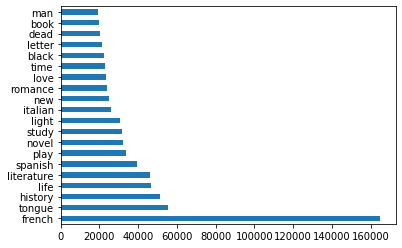

In [11]:
names_several_df.sum().head(20).plot.barh()

In [12]:
exemplars_df.columns.tolist()

['ppn',
 'medium_metadata',
 'title_x',
 'title_supplement',
 'year_metadata',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type_ppn',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'comment_isbn',
 'issn',
 'comment_issn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_ppn',
 'keyword',
 'keyword_loc_ppn',
 'keyword_loc',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'keyword_RSWK',
 

In [13]:
exemplars_df.loc[exemplars_df["names_several"]==""].language_text.value_counts()

ger            148481
ita             22698
fre             22293
spa             19850
ger|fre         18240
                ...  
spa|arn             1
fre|tha             1
fre|baq|spa         1
fre|por|eng         1
ger|slv             1
Name: language_text, Length: 566, dtype: int64

In [14]:
exemplars_df.shape

(746404, 80)

In [15]:
round(exemplars_df.loc[exemplars_df["names_several"]!=""].shape[0] / exemplars_df.shape[0], 2)*100

63.0

In [16]:
exemplars_df = pd.concat([exemplars_df, names_several_df], axis=1)

In [17]:
exemplars_df

ppn medium_metadata                                 title_x  \
ppn                                                                            
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
...              ...             ...                                     ...   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   

                                            title_supplement year_metadata  \
ppn                                                                          
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
...                                                      ...           ...   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
899017452                                               None          2017   
899017452                                               None          2017   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
...                  ...               ...              ...           ...   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
899017452  0018:11-10-17              None             None          None   
899017452  0018:11-10-17              None             None          None   

                editor_first_name  ... pipe_dream monsieur effigy draft  \
ppn                                ...                                    
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
...                           ...  ...        ...      ...    ...   ...   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0 

In [18]:
names_several_lt = [column for column in names_several_df.columns.tolist() if len(column) > 2]

In [19]:
names_several_lt

['french',
 'tongue',
 'history',
 'life',
 'literature',
 'spanish',
 'play',
 'novel',
 'study',
 'light',
 'italian',
 'new',
 'romance',
 'love',
 'time',
 'black',
 'letter',
 'dead',
 'book',
 'man',
 'write',
 'report',
 'language',
 'big',
 'frenchman',
 'critical',
 'world',
 'read',
 'literary',
 'right',
 'writing',
 'death',
 'work',
 'lyric',
 'century',
 'hundred',
 'culture',
 'make',
 'voice',
 'think',
 'day',
 'fib',
 'spaniard',
 'modern',
 'france',
 'poetry',
 'change',
 'poetic',
 'end',
 'natural_language',
 'tense',
 'word',
 'latin',
 'dictionary',
 'night',
 'fresh',
 'body',
 'linguistic',
 'old',
 'story',
 'age',
 'form',
 'war',
 'place',
 'little',
 'memory',
 'weather',
 'vocabulary',
 'period',
 'small',
 'average',
 'speech',
 'narrative',
 'early',
 'terminology',
 'space',
 'linguistic_process',
 'good',
 'earth',
 'woman',
 'contemporary',
 'reading',
 'subject',
 'last',
 'present',
 'name',
 'human',
 'narration',
 'politics',
 'field',
 'art',
 '

In [20]:
exemplars_df

ppn medium_metadata                                 title_x  \
ppn                                                                            
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
...              ...             ...                                     ...   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   

                                            title_supplement year_metadata  \
ppn                                                                          
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
...                                                      ...           ...   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
899017452                                               None          2017   
899017452                                               None          2017   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
...                  ...               ...              ...           ...   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
899017452  0018:11-10-17              None             None          None   
899017452  0018:11-10-17              None             None          None   

                editor_first_name  ... pipe_dream monsieur effigy draft  \
ppn                                ...                                    
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
...                           ...  ...        ...      ...    ...   ...   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0 

In [21]:
exemplars_df["ppn"]

ppn
010007121    010007121
010007121    010007121
010007121    010007121
010007121    010007121
010007121    010007121
               ...    
89901691X    89901691X
89901691X    89901691X
89901691X    89901691X
899017452    899017452
899017452    899017452
Name: ppn, Length: 746404, dtype: object

In [22]:
#exemplars_df.drop("ppn", axis="columns", inplace=True)

In [23]:
#exemplars_df.drop("ppn", axis="columns", inplace=True)

In [24]:
#exemplars_df["ppn"] = exemplars_df.index

In [25]:
#exemplars_df.reset_index(inplace=True, drop=True)

In [26]:
#exemplars_df

In [27]:
#exemplars_df[["year_publication"]+ names_several_lt]

In [28]:
#exemplars_df[["year_publication"]+ names_several_lt].groupby(["year_publication"])

In [29]:
#exemplars_df[["ppn"]]

In [30]:
exemplars_df.columns.value_counts()

land          1
conversion    1
catch         1
daily         1
paris         1
             ..
eden          1
the           1
can           1
plant         1
market        1
Length: 1080, dtype: int64

In [31]:
#exemplars_df.drop("year",axis="columns",inplace=True)

In [32]:
#exemplars_df.drop("medium",axis="columns",inplace=True)


In [33]:
exemplars_df

ppn medium_metadata                                 title_x  \
ppn                                                                            
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
...              ...             ...                                     ...   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   

                                            title_supplement year_metadata  \
ppn                                                                          
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
...                                                      ...           ...   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
899017452                                               None          2017   
899017452                                               None          2017   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
...                  ...               ...              ...           ...   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
899017452  0018:11-10-17              None             None          None   
899017452  0018:11-10-17              None             None          None   

                editor_first_name  ... pipe_dream monsieur effigy draft  \
ppn                                ...                                    
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
...                           ...  ...        ...      ...    ...   ...   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0 

In [34]:
years_names_several_exemplars_df = exemplars_df[["year_publication"]+ names_several_lt].groupby(["year_publication"])[names_several_lt].sum()
years_names_several_exemplars_df

french  tongue  history  life  literature  spanish  play  \
year_publication                                                             
1980                3694     897      974   913         727      583   904   
1981                3417     705      810   843         713      516  1578   
1982                2415     673      772   792         482      353   620   
1983                2844     503      620   850         842      457   355   
1984                3257     935      828   988         964      514   891   
1985                3170    1431      810   809         630      600  1586   
1986                3675     771     1119  1112         575      912   727   
1987                3719     768      810   966         773      699  1081   
1988                3745    1184     1018  1334         989      600   675   
1989                4617    1321     1231   745        1096      599   623   
1990                4857    1196     1154  1092         961      874   214   
1991                4869    1199      893  1983         991      920  1075   
1992                4675    1048     1093  1477        1407      994  1534   
1993                4663     966     1431  1512        1442      921   591   
1994                4057    1467     1252   788        1514     1164   789   
1995                4723    1429     1259  1463        1384     1055  1009   
1996                5838    2062     1885  1187        1416     1281   643   
1997                5708    1894     1942  1089        1397     1249   902   
1998                6690    1621     1524  1193        1377     1363   989   
1999                5749    1638     1783  1515        1876     1813  1241   
2000                4989    1520     1580  1538        1213     1100  1093   
2001                3842    1652     1463  1246        1268     1192  1828   
2002                3502    1029     1300   592        1137     1245  1095   
2003                4232    1775     1669  1031        1063     1109  1082   
2004                4615    1543     1424  1198        1534     1318   459   
2005                4126    1882     2146  1368        1372     1267   688   
2006                4039    2478     1504  1012        1237     1125   407   
2007                4724    1999     1527  1100        1635     1243   891   
2008                4772    1646     1638  1007        1369     1180   589   
2009                4654    2391     1222  1597        1424     1177  1098   
2010                3636    1872     1489  1386        1287     1169  1156   
2011                5075    1363     1578  1290        1223     1142  1323   
2012                4400    1918     1463  1773         896     1229   421   
2013                3010    1154     1311  1265        1458      988   581   
2014                3326    1217     1023  1118         967      801   654   
2015                3415    1599      938  1378         720      979   721   
2016                3494    1319     1369  1160        1334     1051   298   
2017                2650    1113     1186  1016        1158      736   574   
2018                3201     925     1250  1110        1096      772   381   
2019                2558    1314     1131   738        1235      978   505   

                  novel  study  light  ...  pipe_dream  monsieur  effigy  \
year_publication                       ...                                 
1980                556    509    224  ...           5        11      11   
1981                689    560    153  ...          11        15      39   
1982                602    989    674  ...          39        51       6   
1983                678    806    428  ...           9        10      18   
1984                929    698    355  ...          34        35      45   
1985                626    489   1355  ...          16        37      19   
1986                654    636    404  ...          16        35      27   
1987                473    824    638  ...          28   

In [35]:


years_names_several_exemplars_rel_df = (years_names_several_exemplars_df.loc[:].div(years_names_several_exemplars_df.sum(axis='columns'), axis="index")*100).round(2)


In [36]:
years_names_several_exemplars_rel_df

french  tongue  history  life  literature  spanish  play  \
year_publication                                                             
1980                5.89    1.43     1.55  1.46        1.16     0.93  1.44   
1981                5.58    1.15     1.32  1.38        1.16     0.84  2.58   
1982                3.84    1.07     1.23  1.26        0.77     0.56  0.98   
1983                4.46    0.79     0.97  1.33        1.32     0.72  0.56   
1984                4.41    1.27     1.12  1.34        1.31     0.70  1.21   
1985                4.50    2.03     1.15  1.15        0.89     0.85  2.25   
1986                4.76    1.00     1.45  1.44        0.74     1.18  0.94   
1987                5.30    1.09     1.15  1.38        1.10     1.00  1.54   
1988                4.50    1.42     1.22  1.60        1.19     0.72  0.81   
1989                5.34    1.53     1.42  0.86        1.27     0.69  0.72   
1990                5.63    1.39     1.34  1.27        1.11     1.01  0.25   
1991                5.06    1.25     0.93  2.06        1.03     0.96  1.12   
1992                4.52    1.01     1.06  1.43        1.36     0.96  1.48   
1993                4.26    0.88     1.31  1.38        1.32     0.84  0.54   
1994                3.52    1.27     1.09  0.68        1.31     1.01  0.68   
1995                4.04    1.22     1.08  1.25        1.18     0.90  0.86   
1996                4.55    1.61     1.47  0.92        1.10     1.00  0.50   
1997                4.27    1.42     1.45  0.81        1.04     0.93  0.67   
1998                4.90    1.19     1.12  0.87        1.01     1.00  0.72   
1999                4.25    1.21     1.32  1.12        1.39     1.34  0.92   
2000                4.17    1.27     1.32  1.29        1.01     0.92  0.91   
2001                3.16    1.36     1.20  1.02        1.04     0.98  1.50   
2002                3.28    0.96     1.22  0.55        1.06     1.17  1.03   
2003                3.80    1.60     1.50  0.93        0.96     1.00  0.97   
2004                3.61    1.21     1.11  0.94        1.20     1.03  0.36   
2005                3.25    1.48     1.69  1.08        1.08     1.00  0.54   
2006                3.40    2.09     1.27  0.85        1.04     0.95  0.34   
2007                3.57    1.51     1.15  0.83        1.24     0.94  0.67   
2008                4.05    1.40     1.39  0.86        1.16     1.00  0.50   
2009                3.86    1.98     1.01  1.32        1.18     0.98  0.91   
2010                3.15    1.62     1.29  1.20        1.11     1.01  1.00   
2011                4.26    1.14     1.32  1.08        1.03     0.96  1.11   
2012                4.00    1.74     1.33  1.61        0.82     1.12  0.38   
2013                2.98    1.14     1.30  1.25        1.45     0.98  0.58   
2014                3.63    1.33     1.12  1.22        1.06     0.87  0.71   
2015                3.59    1.68     0.99  1.45        0.76     1.03  0.76   
2016                3.56    1.34     1.39  1.18        1.36     1.07  0.30   
2017                3.07    1.29     1.37  1.18        1.34     0.85  0.66   
2018                3.90    1.13     1.52  1.35        1.34     0.94  0.46   
2019                3.23    1.66     1.43  0.93        1.56     1.23  0.64   

                  novel  study  light  ...  pipe_dream  monsieur  effigy  \
year_publication                       ...                                 
1980               0.89   0.81   0.36  ...        0.01      0.02    0.02   
1981               1.12   0.91   0.25  ...        0.02      0.02    0.06   
1982               0.96   1.57   1.07  ...        0.06      0.08    0.01   
1983               1.06   1.26   0.67  ...        0.01      0.02    0.03   
1984               1.26   0.94   0.48  ...        0.05      0.05    0.06   
1985               0.89   0.69   1.92  ...        0.02      0.05    0.03   
1986               0.85   0.82   0.52  ...        0.02      0.05    0.03   
1987               0.67   1.17   0.91  ...        0.04   

In [37]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

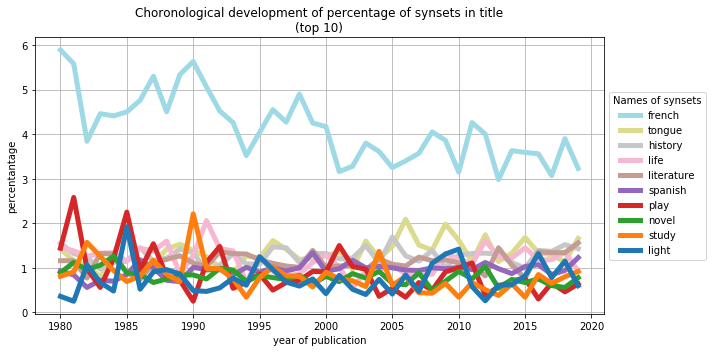

In [40]:
visualize.plot_lines(years_names_several_exemplars_rel_df.iloc[:,0:10], title = "Choronological development of percentage of synsets in title\n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")


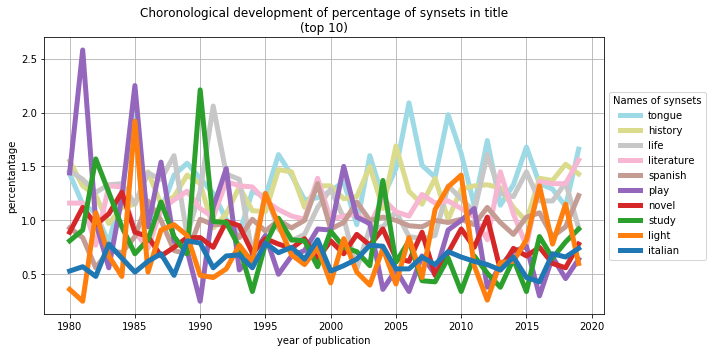

In [41]:
visualize.plot_lines(years_names_several_exemplars_rel_df.iloc[:,1:11], title = "Choronological development of percentage of synsets in title\n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")


In [ ]:
visualize.plot_lines(years_names_several_exemplars_rel_df.iloc[:,1:11], title = "Choronological development of percentage of synsets in title\n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")


In [43]:
regression_results_df = statistical_tests.calculate_regression_line(years_names_several_exemplars_rel_df)

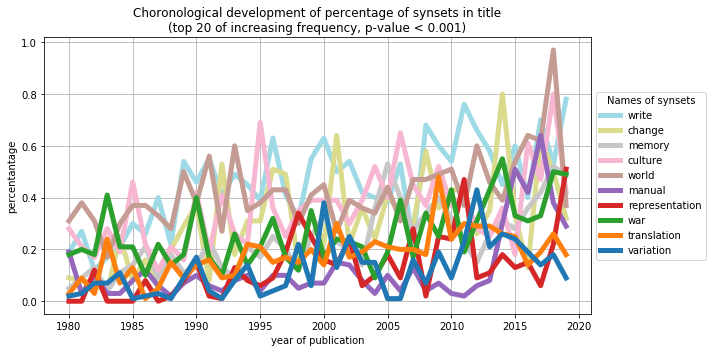

In [46]:
visualize.plot_lines(years_names_several_exemplars_rel_df[regression_results_df.loc[regression_results_df["pvalue"] < 0.001].head(10).index], title = "Choronological development of percentage of synsets in title\n(top 20 of increasing frequency, p-value < 0.001)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")


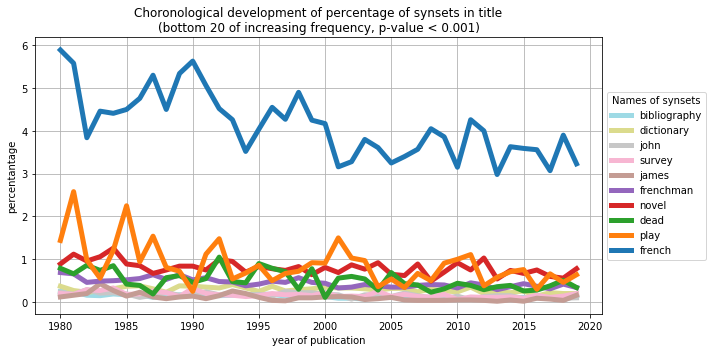

In [49]:
visualize.plot_lines(years_names_several_exemplars_rel_df[regression_results_df.loc[regression_results_df["pvalue"] < 0.001].iloc[-10:,:].index], title = "Choronological development of percentage of synsets in title\n(bottom 20 of increasing frequency, p-value < 0.001)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")

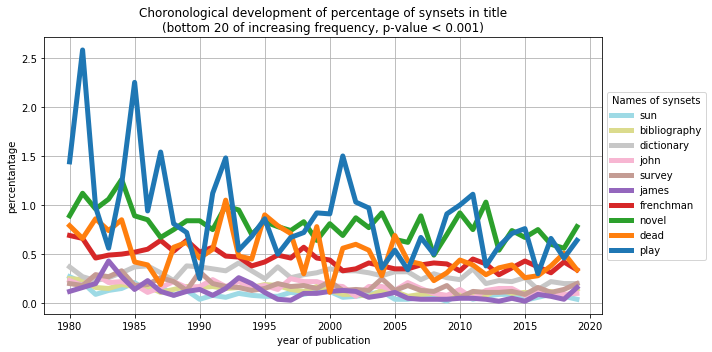

In [48]:
visualize.plot_lines(years_names_several_exemplars_rel_df[regression_results_df.loc[regression_results_df["pvalue"] < 0.001].iloc[-11:-1,:].index], title = "Choronological development of percentage of synsets in title\n(bottom 20 of increasing frequency, p-value < 0.001)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Names of synsets")


In [44]:
regression_results_df.loc[regression_results_df["pvalue"] < 0.001].head(20).index

column     slope  intercept    rvalue        pvalue    stderr
column                                                               
write    write  0.009975 -19.488106  0.696633  5.954953e-07  0.001666
change  change  0.008970 -17.625477  0.577927  9.414534e-05  0.002055
make      make  0.008581 -16.809311  0.441874  4.309246e-03  0.002826
memory  memory  0.008462 -16.681846  0.773737  4.787900e-09  0.001124
right    right  0.008243 -16.112557  0.261885  1.025919e-01  0.004928
...        ...       ...        ...       ...           ...       ...
letter  letter -0.007598  15.744199 -0.371420  1.829058e-02  0.003081
dead      dead -0.009783  20.070462 -0.520969  5.676060e-04  0.002600
study    study -0.013800  28.401725 -0.457242  3.014705e-03  0.004354
play      play -0.021139  43.144604 -0.505796  8.701332e-04  0.005849
french  french -0.047265  98.632948 -0.729788  9.144757e-08  0.007183

[992 rows x 6 columns]

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


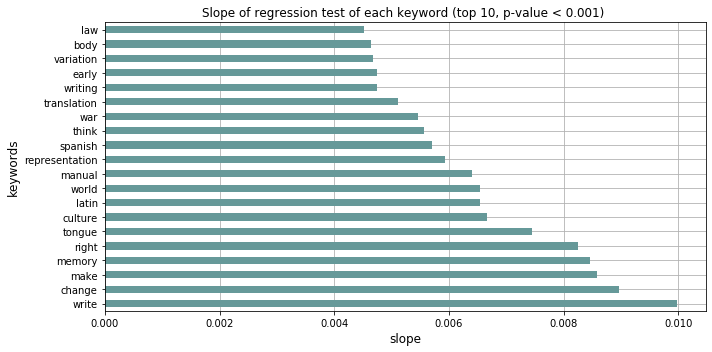

In [50]:
visualize.plot_bars(regression_results_df[["slope"]].head(20).T, title ="Slope of regression test of each keyword (top 10, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords")

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


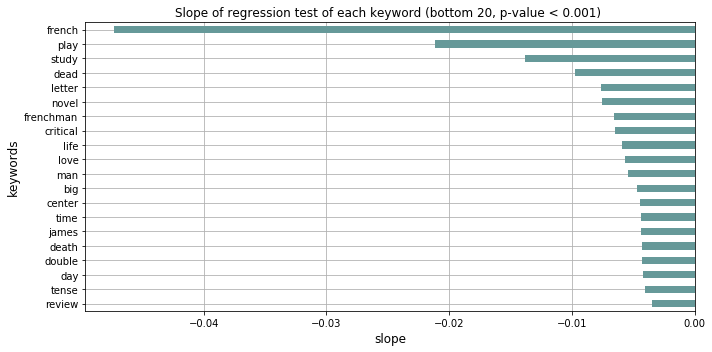

In [51]:
visualize.plot_bars(regression_results_df[["slope"]].tail(20).T, title ="Slope of regression test of each keyword (bottom 20, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords")

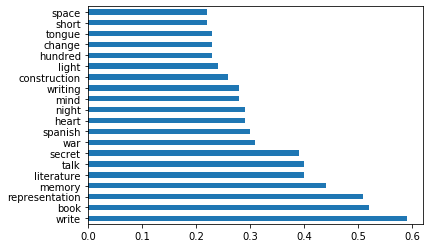

In [52]:
years_names_several_exemplars_rel_df.diff().sum().sort_values(ascending=False).head(20).plot.barh()

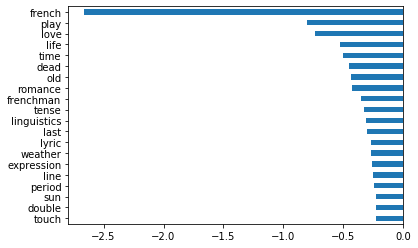

In [53]:
years_names_several_exemplars_rel_df.diff().sum().sort_values(ascending=False).tail(20).plot.barh()

In [54]:
exemplars_df

ppn medium_metadata                                 title_x  \
ppn                                                                            
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
010007121  010007121             Aar                           @Jean-Jacques   
...              ...             ...                                     ...   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
89901691X  89901691X             Aau                El @Siglo de Oro español   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   
899017452  899017452             Aau  Mística y filosofía en el Siglo de Oro   

                                            title_supplement year_metadata  \
ppn                                                                          
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
010007121  the early life and work of Jean-Jacques Rousse...          1983   
...                                                      ...           ...   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
89901691X                            de Garcilaso a Calderón          2017   
899017452                                               None          2017   
899017452                                               None          2017   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
010007121  2000:09-01-87           Maurice         Cranston    1230638350   
...                  ...               ...              ...           ...   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
89901691X  0018:11-10-17           Mariano  Fazio Fernández     795881363   
899017452  0018:11-10-17              None             None          None   
899017452  0018:11-10-17              None             None          None   

                editor_first_name  ... pipe_dream monsieur effigy draft  \
ppn                                ...                                    
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
010007121                    None  ...          0        0      0     0   
...                           ...  ...        ...      ...    ...   ...   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
89901691X                    None  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0      0     0   
899017452  José Luis|Manuel|Idoya  ...          0        0 

In [57]:
exemplars_df.loc[exemplars_df["write"]>0]["title_y"].sample(5).values.tolist()

['Les mots et autres écrits autobiographiques',
 'Pasé la mañana escribiendo',
 'Écrire pour la danse',
 'Prayer in the writings of Jean-Jacques Rousseau',
 'Maurice Blanchot and fragmentary writing']

In [58]:
['Les mots et autres écrits autobiographiques',
 'Pasé la mañana escribiendo',
 'Écrire pour la danse',
 'Prayer in the writings of Jean-Jacques Rousseau',
 'Maurice Blanchot and fragmentary writing']

['Les mots et autres écrits autobiographiques',
 'Pasé la mañana escribiendo',
 'Écrire pour la danse',
 'Prayer in the writings of Jean-Jacques Rousseau',
 'Maurice Blanchot and fragmentary writing']

In [59]:
regression_results_df.head(20).index.tolist()

['write',
 'change',
 'make',
 'memory',
 'right',
 'tongue',
 'culture',
 'latin',
 'world',
 'manual',
 'representation',
 'spanish',
 'think',
 'war',
 'translation',
 'writing',
 'early',
 'variation',
 'body',
 'law']

In [66]:
for word in regression_results_df.head(10).index.tolist():
    print("\n- <b>" + word + "</b>: ", "; ".join(exemplars_df.loc[exemplars_df[word]>0]["title_y"].sample(5).values.tolist()))




- <b>write</b>:  Escribiendo la independencia; La aparición de los libros plúmbeos y los modos de escribir la historia; Bibliographie analytique des écrits relatifs à Voltaire; Writing without words; Écrire

- <b>change</b>:  Managing Technological Change; La heteronimia poética y sus variaciones trasatlánticas; Christine de Pizan's changing opinion; Vivacité et diversité de la variation linguistique; La variation graphique

- <b>make</b>:  The making of poetry; Ouvrages anonymes: A - L; The legislative works of Alfonso X, el Sabio; Petrarchism at Work; Faire des affaires en français

- <b>memory</b>:  Lieux de migrations - lieux de mémoires franco-allemands; Travaux et mémoires; Campos de la memoria; El andar tierras, deseos y memorias; Baudelaire and the art of memory

- <b>right</b>:  Bon petit soldat; NGOs and the struggle for human rights in Europe; Human rights related trade measures under international law; Les bons sauvages; Política y derecho

- <b>tongue</b>:  Storia della l

In [65]:
for word in regression_results_df.tail(10).index.tolist():
    print("\n- <b>" + word + "</b>: ", "; ".join(exemplars_df.loc[exemplars_df[word]>0]["title_y"].sample(5).values.tolist()))




- <b>love</b>:  Les passions et la sagesse; Tormentos de amor; Zulima ou l'Amour pur; Cosas de amor; Passion simple

- <b>life</b>:  Passar la vita a Diol Kadd; Les vies de Voltaire; Les âges de la vie au Moyen Âge; Un giorno e per tutta la vita; Vida de Pedro Saputo

- <b>critical</b>:  Études critiques sur le christianisme; Oeuvres & critiques; Momentos críticos; Los escritores hispanoamericanos frente a sus críticos; La réception critique de l'œuvre de Marguerite Yourcenar

- <b>frenchman</b>:  Précis de syntaxe du français contemporain; Variétés géographiques du français de France aujourd'hui; Discours, diachronie, stylistique du français; Abréviations du français familier, populaire et argotique; La représentation de l'histoire dans la nouvelle en langue française du XIXe siècle

- <b>novel</b>:  Théâtres du nouveau roman; Novela española contemporánea; Nouvelles directions de la recherche proustienne; Rimbaud nouveau; Figures féminines et roman

- <b>letter</b>:  Nouvelles lettr

In [67]:
print("\n","space", ": ", "; ".join(exemplars_df.loc[exemplars_df["space"]>0]["title_y"].sample(5).values.tolist()))




 space :  Los espacios del "Primero sueño" de Sor Juana Inés de la Cruz; La toponimia como percepción del espacio; La place du sujet en français contemporain; Spazio vissuto e dinamica linguistica; Place Jacques-Cartier ou quarante ans de théâtre français à Québec
